<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%B5_Pandas_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Работа с таблицами данных на примере Pandas. Часть 2

Pandas, часть 2.
*   Работа с индексами строк и столбцов
*   Мультииндекс
    *    Создание мультииндекса вручную
    *    Пример мультииндекса, созданного GroupBy
*   Рассчет статистических показателей
    *    Рассчет статистик для одной колонки
    *    Рассчет статистик для нескольких колонок
    *    Рассчет статистик с использованием GroupBy
    *    Обзор встроенных функций для описательных статистик
*   Объединение данных из нескольких таблиц
    *    Конкатенация по срокам
    *    Конкатенация по столбцам
    *    Объединение с помощью Merge
         *    Inner Join
         *    Left Join
         *    Right Join
         *    Outer Join
    *    Использование метода Join
*   Сортировка
*   DatetimeIndex
    *    Resample
    

# Работа с  индексами строк и столбцов

Мы уже знаем, что доступ к названиям колонок и индексам осущетсвляется через df.columns и df.index

Сбросить значения текущего индекса можно с помощью метода reset_index. Полный список аргументов для метода reset_index можно посмотреть в документации, остановимся на важных:
*    drop - (по умолчанию False) - нужно ли удалять информацию, содержащуюся в старом индексе
*    inplace (по умолчанию False) - возвращается ли результат в виде копии или производим измененеия с исходным DataFrame

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np

In [ ]:
# создадим DataFrame

index = ['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев', 'Кондратьев', 'Соколов']
df = pd.DataFrame({ 'математика': [5, 2, 3, 5, 4, 5, 4, 5],
                    'физика' :    [5, 4, 2, 3, 3, 4, 4, 2], 
                    'литература' :[4, 5, 4, 3, 5, 5, 4, 5],
                    'физкультура':[5, 3, 2, 3, 4, 5, 5, 3],
                    'информатика':[5, 5, 4, 5, 5, 5, 2, 5], 
                   },  index = index)
df # посмотрим на него

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондратьев,4,4,4,5,2
Соколов,5,2,5,3,5


In [ ]:
df.columns # посмотрим, какие колонки есть в нашем DataFrame

Index(['математика', 'физика', 'литература', 'физкультура', 'информатика'], dtype='object')

In [ ]:
# поменяем названия колонок
df.columns = ['МАТЕМАТИКА',  'ФИЗИКА',  'ЛИТЕРАТУРА',  'ФИЗКУЛЬТУРА',  'ИНФОРМАТИКА']
df

,МАТЕМАТИКА,ФИЗИКА,ЛИТЕРАТУРА,ФИЗКУЛЬТУРА,ИНФОРМАТИКА
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондратьев,4,4,4,5,2
Соколов,5,2,5,3,5


In [ ]:
df_ = df.copy() # создадим копию нашего DataFrame

In [ ]:
df_.reset_index(drop=True) # сделаем переиндексацию с удалением индекса

,МАТЕМАТИКА,ФИЗИКА,ЛИТЕРАТУРА,ФИЗКУЛЬТУРА,ИНФОРМАТИКА
0,5,5,4,5,5
1,2,4,5,3,5
2,3,2,4,2,4
3,5,3,3,3,5
4,4,3,5,4,5
5,5,4,5,5,5
6,4,4,4,5,2
7,5,2,5,3,5


In [ ]:
df_.reset_index(inplace=True) # сделаем переиндексацию без удаления индекса, информация о индексе  ушла в колонку index
df_

,index,МАТЕМАТИКА,ФИЗИКА,ЛИТЕРАТУРА,ФИЗКУЛЬТУРА,ИНФОРМАТИКА
0,Иванов,5,5,4,5,5
1,Петров,2,4,5,3,5
2,Сидоров,3,2,4,2,4
3,Кузнецов,5,3,3,3,5
4,Попов,4,3,5,4,5
5,Васильев,5,4,5,5,5
6,Кондратьев,4,4,4,5,2
7,Соколов,5,2,5,3,5


In [ ]:
df_.set_index('index', inplace=True) # установим новый индекс, соответствующий колонке index
df_

,МАТЕМАТИКА,ФИЗИКА,ЛИТЕРАТУРА,ФИЗКУЛЬТУРА,ИНФОРМАТИКА
index,,,,,
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондратьев,4,4,4,5,2
Соколов,5,2,5,3,5


In [ ]:
df_.set_index(df.index, inplace=True) # установим новый индекс, соответствующий колонке index
df_

,МАТЕМАТИКА,ФИЗИКА,ЛИТЕРАТУРА,ФИЗКУЛЬТУРА,ИНФОРМАТИКА
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондратьев,4,4,4,5,2
Соколов,5,2,5,3,5


#  Мультииндекс

Иерархическое индексирование (мультииндекс) - это важный инструмент Pandas, позволяющий реализовать несколько уровней иерархии вдоль одной оси. Попробуем разобраться что это такое на примерах.

## Индексирование через индекс, созданный вручную

! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/city_temperature.csv

--2021-04-15 09:28:10--  http://dataudt.ru/datasets/city_temperature.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140600832 (134M) [application/octet-stream]
Saving to: ‘city_temperature.csv’

city_temperature.cs 100%[===================>] 134.09M  54.8MB/s    in 2.4s    

2021-04-15 09:28:13 (54.8 MB/s) - ‘city_temperature.csv’ saved [140600832/140600832]



In [ ]:
!ls

city_temperature.csv  sample_data


In [ ]:
# загрузим датасет Титаник из csv в DataFrame

df_temp = pd.read_csv('/content/city_temperature.csv')
df_temp.head() # выведем первые строки

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


Вот эти 2 ячейки ниже можно использовать чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
# файлы предварительно уже записали на Google Drive
# после запуска переходим по ссылке, которая появится, для идентификации
# копируем оттуда код authorization code и вставляем здесь в окошко
# Вам нужно создать собственные папки, указать собственный путь, какой у Вас к файлам

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# прочитаем наш DataFrame из CSV файла

#df_temp = pd.read_csv('/content/drive/MyDrive/datasets/city_temperature.csv', low_memory=False)
#df_temp.head()

In [ ]:
# создадим колонку для хранения средней температуры с градусах Цельсия
df_temp['AvgTemperatureC'] = round((df_temp['AvgTemperature'] - 32)*5/9, 1)

In [ ]:
# посмотрим на первые строки DataFrame
df_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.9
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.7
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.3
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.0
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.8


In [ ]:
# отсортируем значения по Региону, Стране, Городу, Году
df_temp.sort_values(['Region', 'Country', 'City', 'Year'],  axis='rows', inplace=True)
df_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.9
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.7
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.3
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.0
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.8


In [ ]:
# создадим Мультииндекс, содержащий информацию о Регионе, Стране, Городе, Годе
multiindex = pd.MultiIndex.from_tuples(list(zip(df_temp['Region'], df_temp['Country'], df_temp['City'], df_temp['Year'])))

In [ ]:
multiindex[0] # выведем первую запись мультииндекса что-бы понять что у него внутри

('Africa', 'Algeria', 'Algiers', 1995)

In [ ]:
multiindex # и посмортим на мультииндекс целиком

MultiIndex([(                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            (                           'Africa',   'Algeria', 'Algiers', ...),
            ...
            ('South/Central America & Carribean', 'Venezuela', 'Caracas', ...),
            ('South/Central America & Carribean', 'Venezuela', 'Caracas', ...),
            ('South/Cent

In [ ]:
# создадим новый DataFrame, в котором будем использовать новый мультииндекс
df_mi = df_temp.set_index(multiindex)
df_mi = df_mi[['Month', 'Day', 'AvgTemperatureC']] # оставим только нужные колонки
df_mi.head(20) # выведем первые 20 значений полученного DataFrame

Month  Day  AvgTemperatureC
Africa Algeria Algiers 1995      1    1             17.9
                       1995      1    2              9.7
                       1995      1    3              9.3
                       1995      1    4              8.0
                       1995      1    5              8.8
                       1995      1    6              9.3
                       1995      1    7              9.4
                       1995      1    8              9.5
                       1995      1    9              9.4
                       1995      1   10             11.1
                       1995      1   11             10.9
                       1995      1   12             10.7
                       1995      1   13              8.3
                       1995      1   14              8.3
                       1995      1   15              8.6
                       1995      1   16              7.7
                       1995      1   17              6.9
                       1995      1   18             10.4
                       1995      1   19             12.2
                       1995      1   20             11.4

In [ ]:
df_mi.loc['Europe'] # отберем значения из региона Европа

Month  Day  AvgTemperatureC
Albania    Tirana   1995      1    1            -72.8
                    1995      1    2            -72.8
                    1995      1    3            -72.8
                    1995      1    4            -72.8
                    1995      1    5            -72.8
...                         ...  ...              ...
Yugoslavia Belgrade 2020      5    9             19.0
                    2020      5   10             21.5
                    2020      5   11             22.5
                    2020      5   12             16.4
                    2020      5   13             11.0

[381990 rows x 3 columns]

In [ ]:
df_mi.loc['Europe', 'Switzerland'] # отберем значения из региона Европа, страна Швейцария

Month  Day  AvgTemperatureC
Bern   1995      1    1              1.9
       1995      1    2             -2.3
       1995      1    3             -4.0
       1995      1    4             -7.9
       1995      1    5            -12.6
...            ...  ...              ...
Zurich 2020      5    9             19.5
       2020      5   10             18.2
       2020      5   11             11.1
       2020      5   12              6.4
       2020      5   13              7.0

[27798 rows x 3 columns]

In [ ]:
df_mi.loc['Europe', 'Switzerland', 'Zurich'] # отберем значения из региона Европа, страна Швейцария, город Цюрих

,Month,Day,AvgTemperatureC
1995,1,1,1.3
1995,1,2,-2.3
1995,1,3,-2.9
1995,1,4,-5.4
1995,1,5,-8.3
...,...,...,...
2020,5,9,19.5
2020,5,10,18.2
2020,5,11,11.1
2020,5,12,6.4


## Пример multiindex, созданного с помощью GroupBy

Часто у нас возникает потребность в группировке данных по какому-либо признаку (хранящемуся в столбцах). В этом нам поможет метод GroupBy

In [ ]:
# сделаем выборку данных за май 2007 года, для этого:
mask_05_2007 = (df_temp['Year'] == 2007) & (df_temp['Month'] == 5) # создадим маску 
df_temp_month = df_temp[mask_05_2007] # сделаем фильтрацию по маске
df_temp_month = df_temp_month[['Region', 'Country', 'City', 'AvgTemperatureC']] # отберем только интересующие нас колонки
df_temp_month.head() # посмотрим на результат (первые стркои)

,Region,Country,City,AvgTemperatureC
4503,Africa,Algeria,Algiers,16.3
4504,Africa,Algeria,Algiers,15.3
4505,Africa,Algeria,Algiers,15.3
4506,Africa,Algeria,Algiers,14.7
4507,Africa,Algeria,Algiers,15.5


In [ ]:
temp_mean = df_temp_month.groupby(['Region', 'Country', 'City']).agg('mean') # найдем среднее по городам, используя GroupBy

In [ ]:
temp_mean.loc['Europe'].head(10) # выборка, показвающая страны и города Европы

,,AvgTemperatureC
Country,City,
Albania,Tirana,19.951613
Austria,Vienna,16.787097
Belarus,Minsk,15.154839
Belgium,Brussels,14.174194
Bulgaria,Sofia,17.509677
Croatia,Zagreb,18.803226
Cyprus,Nicosia,22.151613
Czech Republic,Prague,15.061290
Denmark,Copenhagen,11.774194


In [ ]:
temp_mean.loc['Europe', 'Spain'] # Выберем города Испании

,AvgTemperatureC
City,
Barcelona,18.990323
Bilbao,15.970968
Madrid,15.961290


In [ ]:
temp_mean.loc['Europe', 'Switzerland', 'Geneva'] # посмотрим среднюю темпепратуру в Женеве

AvgTemperatureC    15.209677
Name: (Europe, Switzerland, Geneva), dtype: float64

# Расчёт статистических показателей 

## Расчёт статистик для одной колонки

Для расчета статистического показателя по одной колонке DataFrame или Series нужно применить соответствующий статистический метод этой колонке.


Например:
```
df['имя колонки'].sum() # сумма
df['имя колонки'].mean() # среднее
df['имя колонки'].max() # максимум

```

Результат вернется в виде числа


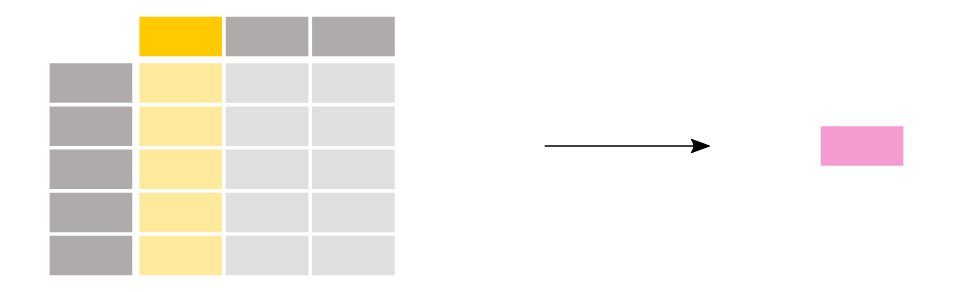

In [ ]:
df_temp.head(2) #вспомним, как выглядел наш DataFrame

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.9
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.7


In [ ]:
df_temp['AvgTemperatureC'].mean() # рассчитаем среднюю температуру по всем записям

13.335465589393394

## Расчёт статистик для нескольких колонок


Если нужно получить статистику по нескольким  колонкам, нужно извлечь эти колонки в новый DataFrame и применить к новому DataFrame статистический метод.

```
df[список колонок].min()
df[список колонок].sum()
```

Результат будет возвращен в виде Series в котором индексы сформированы из списка колонок DataFrame.


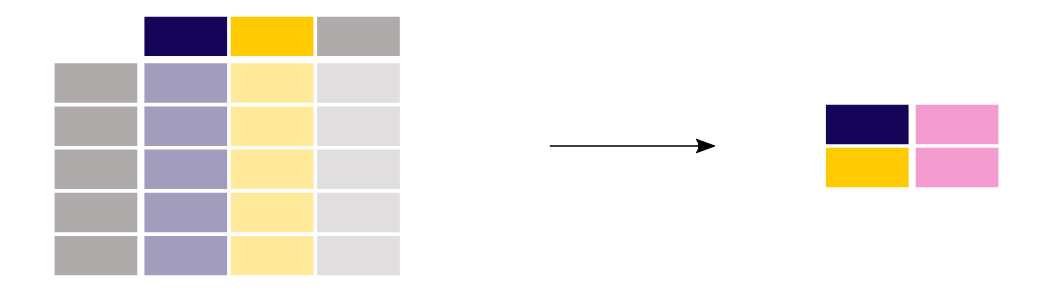

In [ ]:
# найдем среднюю температуру по всему DataFrame для колонок AvgTemperatureC(температура в градусах Цельсия) и AvgTemperature(температура в градусах Фаренгейта)
df_temp[['AvgTemperatureC','AvgTemperature' ]].mean() 

AvgTemperatureC    13.335466
AvgTemperature     56.004921
dtype: float64

Cтандартный набор описательных статистик по числовым колонкам DataFrame можно получить с помощью метода describe.

In [ ]:
df_temp.describe() # выведем стандартный набор статистик методом decribe

,Month,Day,Year,AvgTemperature,AvgTemperatureC
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01,1.333547e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01,1.784939e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01,-7.280000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01,7.700000e+00
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01,1.690000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01,2.420000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02,4.330000e+01


## Расчёт статистик, зависящих от данных с использованием GroupBy

Мы уже успели познакомиться с группировкой DataFrame по значению в колонках с помощью метода GroupBy.

Для вычисления описательных статистик используются следующие конструкции (результат вернется в виде Series)


```
df.grouby(['колонка по которой осуществляется группировка'])['колонка'].max()

df.grouby([список колонок для группировки])['колонка'].mean()

df.grouby([список колонок для группировки])['колонка'].mean()
```

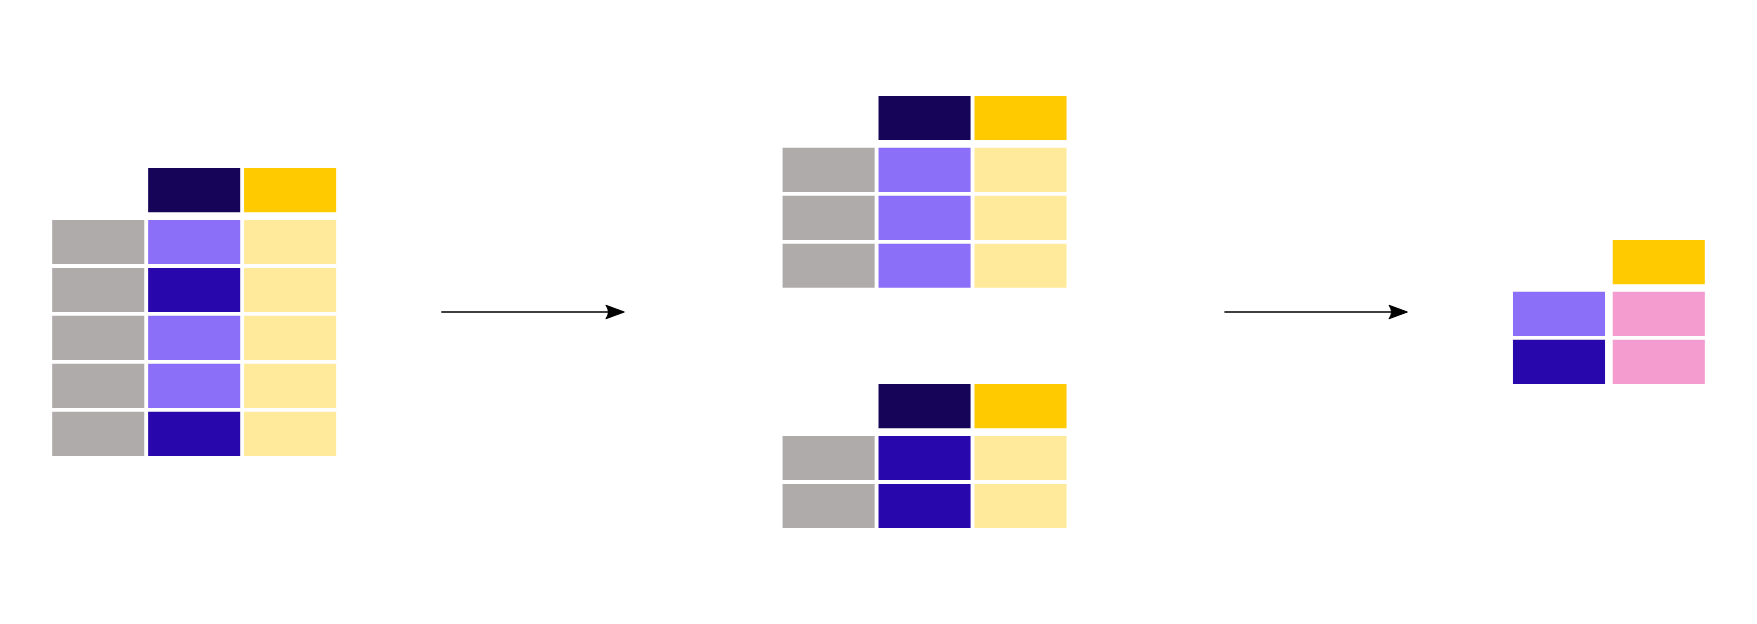

! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/titanic.csv

--2021-04-15 09:28:39--  http://dataudt.ru/datasets/titanic.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29474 (29K) [application/octet-stream]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  28.78K  --.-KB/s    in 0.04s   

2021-04-15 09:28:39 (673 KB/s) - ‘titanic.csv’ saved [29474/29474]



In [ ]:
!ls

city_temperature.csv  sample_data  titanic.csv


In [ ]:
# загрузим датасет Титаник из csv в DataFrame

titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head(10) # выведем первые 10 строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Вот эту ячейку ниже можно использовать чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# загрузим датасет Титаник из csv в DataFrame

#titanic_df = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')
#titanic_df.head(10) # выведем первые 10 строк

In [ ]:
titanic_df.groupby(['Sex'])['Age'].mean() #найдем средний возраст мужчин и жещнин из датасета Титаник

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

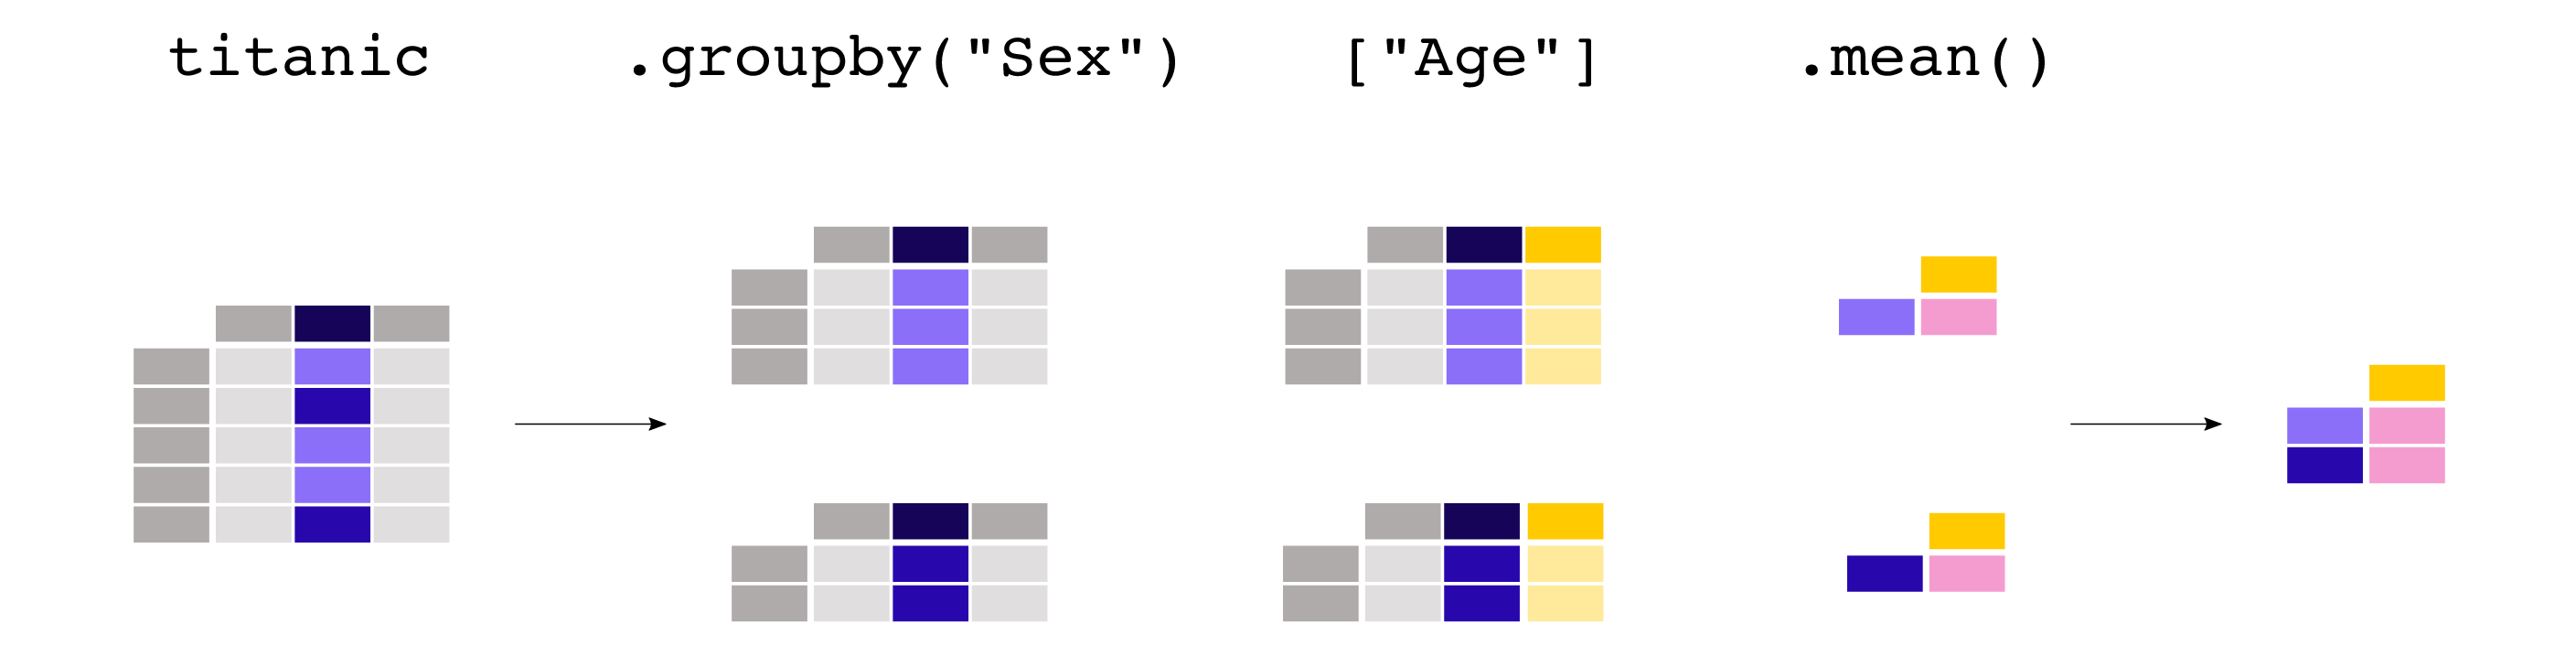

In [ ]:
# найдем средний возраст мужчин и женщин, в разбивке по Pclass (класс каюты)
titanic_df.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         41.333333
        2         24.376552
        3         23.073400
male    1         40.520000
        2         30.940678
        3         24.525104
Name: Age, dtype: float64

Для расчета нескольких статистик можно использовать метод agg (результат вернется в виде DataFrame)
```

df.grouby([колонка или список колонок])['колонка'].agg([список статистик])

```

In [ ]:
titanic_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', 'max', 'min'])

mean  median   max    min
Sex    Pclass                                
female 1       41.333333    41.0  76.0  18.00
       2       24.376552    24.0  60.0   0.92
       3       23.073400    22.0  47.0   0.17
male   1       40.520000    42.0  67.0   6.00
       2       30.940678    28.0  63.0   2.00
       3       24.525104    24.0  60.5   0.33

## Какие есть встроенные функции для описательных статистик?



*   sum() - сумма значений
*   prod() - произведение значений
*   mean() - среднее арифметическое
*   median() - медиана
*   mode() - мода
*   quantile() - расчет квантилей
*   max() - максимальное значение
*   min() - минимальное значение

полный список можно посмотреть в [официальной документации Pandas](https://pandas.pydata.org/docs/user_guide/basics.html#basics-stats)  


# Объединение данных из нескольких DataFrame

В практической работе с данными мы часто будем сталкиваться с необходимостью объединить данные из нескольких источников.  Именно этому и будет посвящен следующий раздел.

## Конкатенация по строкам

В самом простом случае мы имеем две таблицы одного типа (названия и типы столбцов совпадают), нам нужно объединить их в одну, объединив строки из первого и второго DataFrame. Делается это с  помощью функциии pd.concat


```
pd.concat([df1, df2])
```

Аргументы функции pd.concat:


*   obj - список DataFrame для соединения
*   axis (по умолчанию 0, т.е. конкатенация по строкам). Для конкатенации по столбцам нужно указать axis=1
*   join {‘inner’, ‘outer’}, по умолчанию ‘outer’ тип соединения, подробнее про inner и outer мы рассмотрим в методе Merge






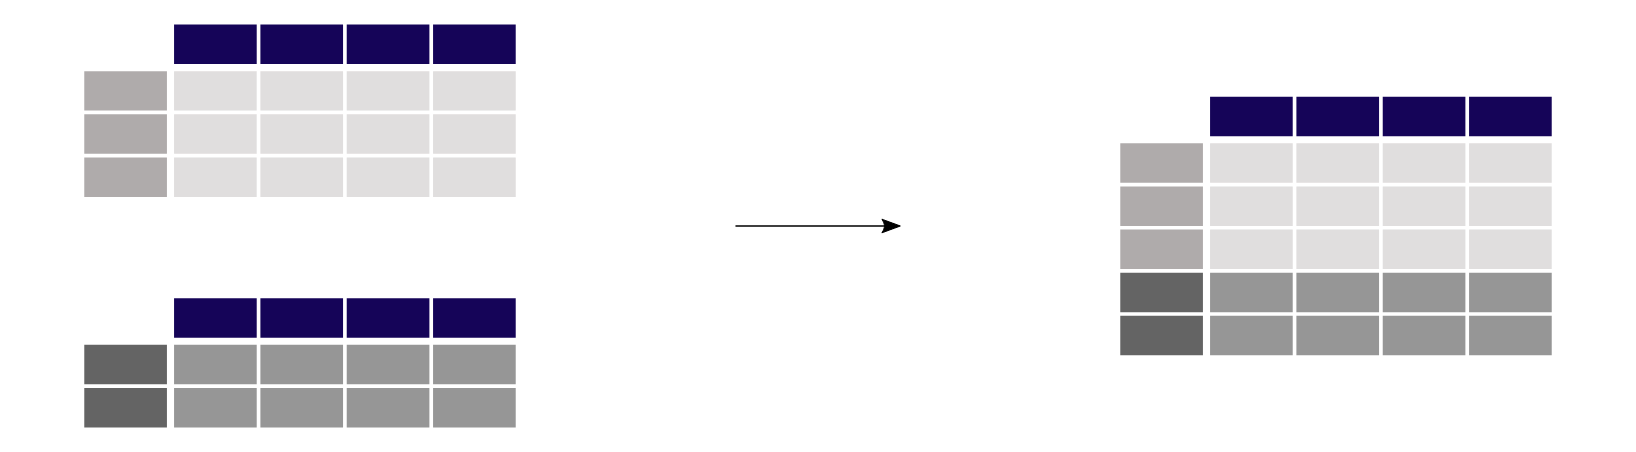

In [ ]:
# создадим таблицу df1
df1 = pd.DataFrame(data = [['A1', 'B1', 'C1', 'D1'],
                           ['A2', 'B2', 'C2', 'D2'],
                           ['A3', 'B3', 'C3', 'D3']], 
                   index = [1, 2, 3], 
                   columns = ['A', 'B', 'C', 'D']
                   )
df1

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
# создадим таблицу df2
df2 = pd.DataFrame(data = [['A4', 'B4', 'C4', 'D4'],
                           ['A5', 'B5', 'C5', 'D5']], 
                   index = [4, 5], 
                   columns = ['A', 'B', 'C', 'D']
                   )
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5


In [ ]:
# объединим строки используя concat
pd.concat([df1, df2])

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5


In [ ]:
# объединим строки используя append
df1.append(df2)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5


## Конкатенация по столбцам

Конкатенация по столбцам осущетсвляется аналогично конкатенации по строкам, но указываем axis = 1

In [ ]:
# создаем два DataFrame
df1 = pd.DataFrame(data = [['A1', 'B1', 'C1'],
                           ['A2', 'B2', 'C2'],
                           ['A3', 'B3', 'C3']], 
                   index = [1, 2, 3], 
                   columns = ['A', 'B', 'C']
                   )

df2 = pd.DataFrame(data = [['D2', 'E2', 'F2'],
                           ['D3', 'E3', 'F3'],
                           ['D4', 'E4', 'F4']], 
                   index = [2, 3, 4], 
                   columns = ['D', 'E', 'F']
                   )

In [ ]:
# выведем первый DataFrame
df1

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [ ]:
# выведем второй DataFrame
df2

,D,E,F
2,D2,E2,F2
3,D3,E3,F3
4,D4,E4,F4


In [ ]:
# объединим ВСЕ строки, параметр join =  'outer'
pd.concat([df1, df2], axis=1, join='outer')

,A,B,C,D,E,F
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,D2,E2,F2
3,A3,B3,C3,D3,E3,F3
4,NaN,NaN,NaN,D4,E4,F4


In [ ]:
# объединим только  строки с совпадающими индексами, параметр join =  'inner'
pd.concat([df1, df2], axis=1, join='inner')

,A,B,C,D,E,F
2,A2,B2,C2,D2,E2,F2
3,A3,B3,C3,D3,E3,F3


## Объединение с помощью метода MERGE

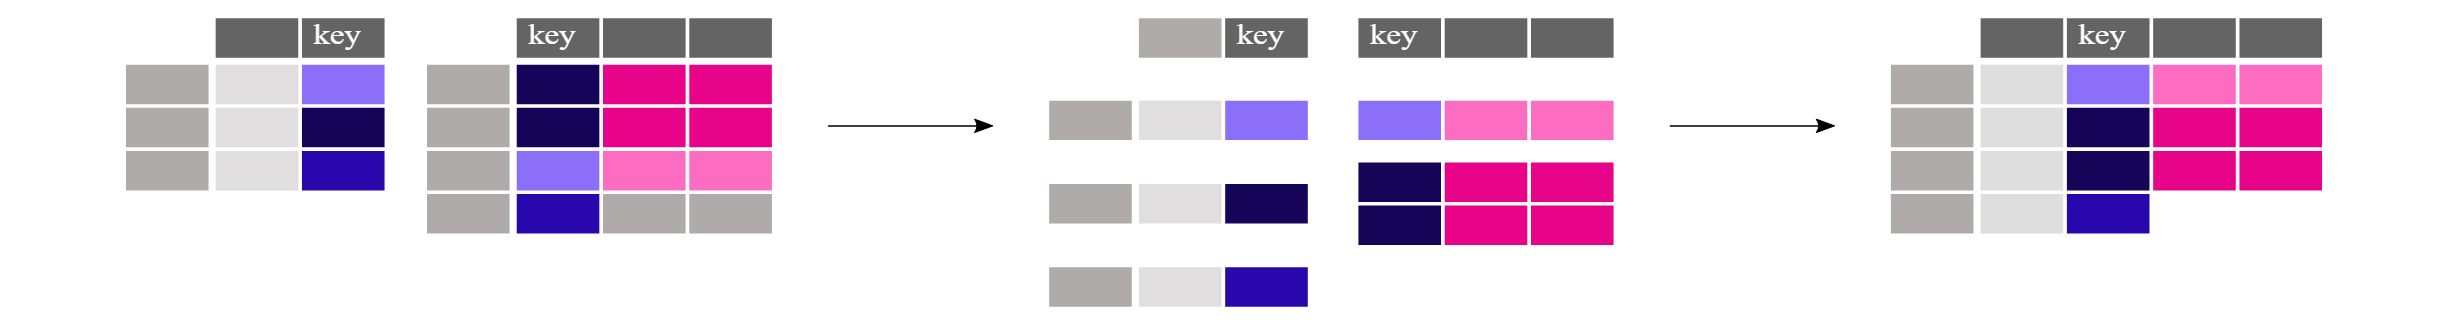

В реальньных проектах нам часто приходится вытаскивать данные из нескольких таблиц.
Рассмотрим пример, в котором у нас есть две таблицы:

Одна таблица хранит данные об оценках всех студентов по предметам
*   id_студента
*   предмет
*   оценка

Другая таблица хранит данные об студентах
*   id_студента
*   домашний адрес
*   телефон
*   курс

Как нам соединить эти данные, используя общее поле id_студента?
В этом нам поможет функция pd.merge.

Общие поля, по которым происходит объединение данных называются **ключами**.

Для тех, кто знаком с SQL стоит упомянуть, что работает merge идентично join в SQL, хотя и называется по другому.  



Для иллюстрации мы будем использовать датасеты с отзывами об Аниме, взятые с https://www.kaggle.com/CooperUnion/anime-recommendations-database

! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/anime.csv

--2021-04-15 09:29:01--  http://dataudt.ru/datasets/anime.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 805572 (787K) [application/octet-stream]
Saving to: ‘anime.csv’

anime.csv           100%[===================>] 786.69K  2.38MB/s    in 0.3s    

2021-04-15 09:29:02 (2.38 MB/s) - ‘anime.csv’ saved [805572/805572]



In [ ]:
!wget http://dataudt.ru/datasets/rating.csv

--2021-04-15 09:29:02--  http://dataudt.ru/datasets/rating.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111404899 (106M) [application/octet-stream]
Saving to: ‘rating.csv’

rating.csv          100%[===================>] 106.24M  49.6MB/s    in 2.1s    

2021-04-15 09:29:04 (49.6 MB/s) - ‘rating.csv’ saved [111404899/111404899]



In [ ]:
!ls

anime.csv  city_temperature.csv  rating.csv  sample_data  titanic.csv


In [ ]:
# прочитаем наши данные и заполним пропуски пустыми строками
anime = pd.read_csv('/content/anime.csv')

In [ ]:
rating = pd.read_csv('/content/rating.csv')

Вот эти ячейки ниже можно использовать чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# прочитаем наши данные и заполним пропуски пустыми строками

#anime = pd.read_csv('/content/drive/MyDrive/datasets/anime.csv')

In [ ]:
#rating = pd.read_csv('/content/drive/MyDrive/datasets/rating.csv')

In [ ]:
anime.fillna('', inplace=True)

In [ ]:
# посмотрим на первую таблица
anime.head()

,anime_id,name,genre,type,episodes
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51


In [ ]:
anime.info() # а также выведем подробную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   name      12294 non-null  object
 2   genre     12294 non-null  object
 3   type      12294 non-null  object
 4   episodes  12294 non-null  object
dtypes: int64(1), object(4)
memory usage: 480.4+ KB


In [ ]:
rating.head() # посмотрим на вторую таблицу 

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
# посчитаем средний рейтинг и количество голосов для каждого аниме исппльзуя groupby 
mean_rating = rating[['anime_id', 'rating']].groupby(['anime_id']).agg(['mean', 'count'])

mean_rating.head()

rating       
              mean  count
anime_id                 
1         7.558514  15509
5         6.890284   6927
6         6.980590  11077
7         6.040320   2629
8         5.113801    413

In [ ]:
mean_rating.columns # выведем индекс по столбцам

MultiIndex([('rating',  'mean'),
            ('rating', 'count')],
           )

In [ ]:
# изменим таблицу с расчитанными статистиками
mean_rating.columns = ['rating_mean', 'rating_count'] #изменим названия колонок
mean_rating = mean_rating.reset_index() # сбросим индекс, отправив anime_id в соответствующую колонку
mean_rating.head() # выведем несколько строк результата

,anime_id,rating_mean,rating_count
0,1,7.558514,15509
1,5,6.890284,6927
2,6,6.980590,11077
3,7,6.040320,2629
4,8,5.113801,413


### Inner Join

при использовании **inner** в итоговую таблицу попадут только те значения, значения ключей в которых имеются и в правой и в левой таблицах (т.е. **пересечение множества ключей** из левой и правой таблицы)

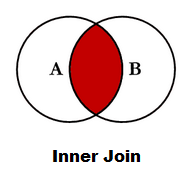

In [ ]:
# объединим таблицы anime и mean_rating по ключу 'anime_id' с указанием how='inner'
anime_inner  = anime.merge(mean_rating, how='inner', on='anime_id')

In [ ]:
anime_inner.head(2) # выведем результат

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,8.028933,24574


In [ ]:
anime_inner.shape # посмотрим количество строк и столбцов

(11197, 7)

In [ ]:
anime_inner.info() #выведем информацию, обратим внимание на количество NaN, их нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11197 entries, 0 to 11196
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      11197 non-null  int64  
 1   name          11197 non-null  object 
 2   genre         11197 non-null  object 
 3   type          11197 non-null  object 
 4   episodes      11197 non-null  object 
 5   rating_mean   11197 non-null  float64
 6   rating_count  11197 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 699.8+ KB


### Left Join

При использовани **left** в итоговую таблицу попадут **все строки левой таблицы** и соответствующие им значения правой таблицы. Если таких значений не найдется, то будет присвоено NaN

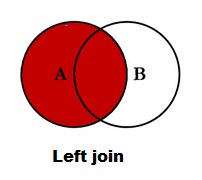

In [ ]:
# объединим таблицы anime и mean_rating по ключу 'anime_id' с указанием how='left'
anime_left = anime.merge(mean_rating, how='left', on='anime_id')

In [ ]:
anime_left.head(2) # выведем результат

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,8.028933,24574.0


In [ ]:
anime_left.shape # посмотрим количество строк и столбцов

(12294, 7)

In [ ]:
# проверим, есть ли в левой части итоговой таблицы пропущенные значения, оказывается их нет
mask_na_left = anime_left['name'].isna()
anime_left[mask_na_left]

,anime_id,name,genre,type,episodes,rating_mean,rating_count


In [ ]:
# посмотрим есть ли пропущенные значения в правой части итоговой таблицы
mask_na_right = anime_left['rating_count'].isna()
anime_left[mask_na_right]

,anime_id,name,genre,type,episodes,rating_mean,rating_count
31,32983,Natsume Yuujinchou Go,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",TV,13,NaN,NaN
62,32995,Yuri!!! on Ice,"Comedy, Sports",TV,12,NaN,NaN
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,NaN,NaN
76,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,NaN,NaN
140,10937,Mobile Suit Gundam: The Origin,"Action, Mecha, Military, Sci-Fi, Shounen, Space",OVA,6,NaN,NaN
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,NaN
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,NaN
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,NaN
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,NaN


Как мы видим нашлось 1097 аниме, для которых нет данных о рейтинге

### Right Join

При использовани **right** в итоговую таблицу попадут **все строки правой таблицы** и соответствующие им значения левой таблицы. Если таких значений не найдется, то будет присвоено NaN

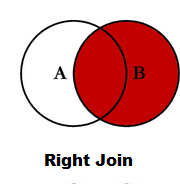

In [ ]:
# объединим таблицы anime и mean_rating по ключу 'anime_id' с указанием how='right'
anime_right = anime.merge(mean_rating, how='right', on='anime_id')

In [ ]:
anime_right.head(2) # выведем результат

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,7.558514,15509
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,6.890284,6927


In [ ]:
anime_right.shape # посмотрим количество строк и столбцов

(11200, 7)

In [ ]:
# проверим, есть ли в левой части итоговой таблицы пропущенный значения, и они найдутся
mask_na_left = anime_right['name'].isna()
anime_right[mask_na_left]

,anime_id,name,genre,type,episodes,rating_mean,rating_count
8251,20261,NaN,NaN,NaN,NaN,-1.000000,1
10392,30913,NaN,NaN,NaN,NaN,1.857143,7
10400,30924,NaN,NaN,NaN,NaN,-1.000000,2


In [ ]:
# проверим, есть ли в правой части итоговой таблицы пропущенный значения, и их нет
mask_na_right = anime_right['rating_count'].isna()
anime_right[mask_na_right]

,anime_id,name,genre,type,episodes,rating_mean,rating_count


### Outer Join

При использовани **outer** в итоговую таблицу попадут **все строки левой таблицы** и **все строки правой таблицы**. Если в правой или левой части не будет найдена пара для какого-то ключа, то будет присвоено значение NaN

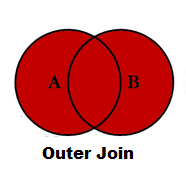

In [ ]:
# объединим таблицы anime и mean_rating по ключу 'anime_id' с указанием how='outer'
anime_outer = anime.merge(mean_rating, how='outer', on='anime_id')

In [ ]:
anime_outer.head(2) # выведем результат

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,8.028933,24574.0


In [ ]:
anime_outer.shape # посмотрим количество строк и столбцов

(12297, 7)

In [ ]:
# проверим, есть ли в левой части итоговой таблицы пропущенные значения, и они найдутся
mask_na_left = anime_outer['name'].isna()
anime_outer[mask_na_left]

,anime_id,name,genre,type,episodes,rating_mean,rating_count
12294,20261,NaN,NaN,NaN,NaN,-1.000000,1.0
12295,30913,NaN,NaN,NaN,NaN,1.857143,7.0
12296,30924,NaN,NaN,NaN,NaN,-1.000000,2.0


In [ ]:
# посмотрим есть ли пропущенные значения в правой части итоговой таблицы
mask_na_right = anime_outer['rating_count'].isna()
anime_outer[mask_na_right]

,anime_id,name,genre,type,episodes,rating_mean,rating_count
31,32983,Natsume Yuujinchou Go,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",TV,13,NaN,NaN
62,32995,Yuri!!! on Ice,"Comedy, Sports",TV,12,NaN,NaN
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,NaN,NaN
76,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,39,NaN,NaN
140,10937,Mobile Suit Gundam: The Origin,"Action, Mecha, Military, Sci-Fi, Shounen, Space",OVA,6,NaN,NaN
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,NaN
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,NaN
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,NaN
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,NaN


## Объединение с помощью метода JOIN

Метод join практически идентичен merge, с той разницей, что в левой таблице ключом является колонка, а в правой - индекс.

In [ ]:
# создадим две таблицы
left_df = pd.DataFrame({ 'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3'],
                       'key': ['K0', 'K1', 'K2', 'K0'], # ключом является колонка
                       })

right_df = pd.DataFrame({ 'C': ['C0', 'C1', 'C2'],
                          'D': ['D0', 'D1', 'D2']}, 
                        index = ['K0', 'K1', 'K2'], # ключом является индекс
                       )

In [ ]:
# посмотрим на левую таблицу
left_df

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K0


In [ ]:
# посмотрим на правую таблицу
right_df

,C,D
K0,C0,D0
K1,C1,D1
K2,C2,D2


In [ ]:
# объедимим таблицы, how = 'left'
left_df.join(right_df, on='key', how='left' )

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K0,C0,D0



# Сортировка

Иногда перед нами стоит задача отсортировать строки в DataFrame в зависимости от значений в колонках. Сортировка выполняется с помощью метода sort_values().
Аргументы:


*   by - указывается колонка или список колонок, по которым осуществляется сортировка
*   ascending - по возрастанию (True, по умолчанию) или по убыванию (False)
*   inplace - возвращается ли копия таблицы (False, по умолчанию) или производятся изменения исходной таблицы (True)


Сделать сортирвоку по индексу можно с помощью метода sort_index(). Аргументы аналогичные sort_values()



In [ ]:
# вспомним, как выглядела одна из наших таблиц
anime_inner.head()

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,8.028933,24574
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,7.956710,1386
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,8.126796,19283
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,7.711952,3673


In [ ]:
# отсортируем зачения по колонке rating_mean по убыванию
anime_inner.sort_values(by='rating_mean', ascending=False, inplace=True)
anime_inner.head(10) # выведем первые 10 строк

,anime_id,name,genre,type,episodes,rating_mean,rating_count
5445,34252,STAR BEAT!: Hoshi no Kodou,Music,Music,1,10.000000,1
8147,31211,Choegang Top Plate,"Action, Comedy, Kids, Sports",TV,26,10.000000,1
9939,33791,Warui no wo Taose!! Salaryman Man,"Comedy, Parody",ONA,1,10.000000,1
9572,33484,Shiroi Zou,"Action, Historical, Kids",Movie,1,10.000000,1
8241,32422,Doukyuusei,"Kids, Music",Music,1,9.000000,2
9567,30939,Shiranpuri,"Drama, School",OVA,1,9.000000,1
6736,31972,Tang Lang Bu Chan,Historical,Movie,1,9.000000,1
9980,29837,"Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, V...","Mystery, Police, Supernatural",Special,1,9.000000,1
10062,30484,Steins;Gate 0,"Sci-Fi, Thriller",,Unknown,8.500000,4
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199


In [ ]:
anime_inner.tail(10) # выведем последние 10 строк

,anime_id,name,genre,type,episodes,rating_mean,rating_count
9981,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,-1.0,1
8962,33183,Mahoutsukai Precure! Movie,"Action, Fantasy, Magic, School, Shoujo, Slice ...",Movie,1,-1.0,1
8963,20499,Maji,"Drama, Shounen",OVA,3,-1.0,3
9978,12795,Yajikita Gakuen Douchuuki,"Adventure, Martial Arts, School, Shoujo",OVA,2,-1.0,1
8966,9818,Mak Dau BoloYao WongZi,Comedy,Movie,1,-1.0,1
8969,25073,Makiba no Shoujo Katori Specials,"Adventure, Drama, Historical, Slice of Life",Special,2,-1.0,1
8970,20229,Makkuro na Obentou,"Drama, Historical",Movie,1,-1.0,1
8971,8372,Makoto-chan,Comedy,Movie,1,-1.0,1
8974,26087,Mama Ohanashi Kikasete,"Fantasy, Kids",TV,15,-1.0,1
11196,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,-1.0,2


In [ ]:
# произведем сортировку по рейтингу и количеству голосов, по убыванию
anime_inner.sort_values(by=['rating_mean', 'rating_count'], ascending=False, inplace=True)
anime_inner.head(10) # выведем первые 10 строк

,anime_id,name,genre,type,episodes,rating_mean,rating_count
5445,34252,STAR BEAT!: Hoshi no Kodou,Music,Music,1,10.000000,1
8147,31211,Choegang Top Plate,"Action, Comedy, Kids, Sports",TV,26,10.000000,1
9939,33791,Warui no wo Taose!! Salaryman Man,"Comedy, Parody",ONA,1,10.000000,1
9572,33484,Shiroi Zou,"Action, Historical, Kids",Movie,1,10.000000,1
8241,32422,Doukyuusei,"Kids, Music",Music,1,9.000000,2
9567,30939,Shiranpuri,"Drama, School",OVA,1,9.000000,1
6736,31972,Tang Lang Bu Chan,Historical,Movie,1,9.000000,1
9980,29837,"Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, V...","Mystery, Police, Supernatural",Special,1,9.000000,1
10062,30484,Steins;Gate 0,"Sci-Fi, Thriller",,Unknown,8.500000,4
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199


In [ ]:
anime_inner.tail(10) # выведем последние 10 строк

,anime_id,name,genre,type,episodes,rating_mean,rating_count
9985,20205,Yama ni Kagayaku: Guide-ken Heiji Gou,"Drama, Slice of Life",Special,1,-1.0,1
9984,10563,Yakyuukyou no Uta: Kita no Ookami Minami no Tora,"Action, Drama, Sports",Movie,1,-1.0,1
9981,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,-1.0,1
8962,33183,Mahoutsukai Precure! Movie,"Action, Fantasy, Magic, School, Shoujo, Slice ...",Movie,1,-1.0,1
9978,12795,Yajikita Gakuen Douchuuki,"Adventure, Martial Arts, School, Shoujo",OVA,2,-1.0,1
8966,9818,Mak Dau BoloYao WongZi,Comedy,Movie,1,-1.0,1
8969,25073,Makiba no Shoujo Katori Specials,"Adventure, Drama, Historical, Slice of Life",Special,2,-1.0,1
8970,20229,Makkuro na Obentou,"Drama, Historical",Movie,1,-1.0,1
8971,8372,Makoto-chan,Comedy,Movie,1,-1.0,1
8974,26087,Mama Ohanashi Kikasete,"Fantasy, Kids",TV,15,-1.0,1


In [ ]:
anime_inner.sort_index(inplace=True)
anime_inner.head()

,anime_id,name,genre,type,episodes,rating_mean,rating_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,8.297863,2199
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,8.028933,24574
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,7.956710,1386
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,8.126796,19283
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,7.711952,3673


# Datetime index

## Коротко о datetime

Дата и время - очень важны, грамотная манипуляция ими нужна для успешного решения многих задач безнес-анализа. Именно по этому в python существует модуль datetime, включающий в себя классы и методы:

Классы:
*   datetime.date(year, month, day)
*   datetime.timedelta - разница между двумя моментами времени, с точностью до микросекунд.
*   datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None) - комбинация даты и времени.

Методы:
*   datetime.today() - объект datetime из текущей даты и времени. Работает также, как и datetime.now() со значением tz=None.
*   datetime.combine(date, time) - объект datetime из комбинации объектов date и time.
*   datetime.strptime(date_string, format) - преобразует строку в datetime (так же, как и функция strptime из модуля time).
*   datetime.date() - объект даты (с отсечением времени).
*   datetime.time() - объект времени (с отсечением даты).
*   datetime.weekday() - день недели в виде числа, понедельник - 0, воскресенье - 6

Импорт модуля осуществляется с помощью команды:


```
import datetime
```

Однако глубокое знакомство с методами datetime выходит за рамки курса. При желании вы сможете разобраться с ними самостоятельно.




Что важно для нас - **pd.to_datetime** это метод, позволяющий преобразовать строковые данные в формат datetime  .  Вот некоторые его аргументы:

*   **dayfirst** начинается ли дата со дня, по умолчанию False
*   **yearfirst** начинается ли дата с года, по умолчанию False

Т.к. формат текстового значения даты может отличаться от одного файла к другому важно грамотно подобрать аргументы парсинга. 

**Datetime_index** - это индекс, в котором используются данные типа datetime.




! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/Weather.csv

--2021-04-15 09:29:10--  http://dataudt.ru/datasets/Weather.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1302472 (1.2M) [application/octet-stream]
Saving to: ‘Weather.csv’

Weather.csv         100%[===================>]   1.24M  5.02MB/s    in 0.2s    

2021-04-15 09:29:10 (5.02 MB/s) - ‘Weather.csv’ saved [1302472/1302472]



In [ ]:
!ls

anime.csv	      rating.csv   titanic.csv
city_temperature.csv  sample_data  Weather.csv


In [ ]:
# используем датасет о погоде взятый с https://www.kaggle.com/meinertsen/new-york-city-taxi-trip-hourly-weather-data
weather_df = pd.read_csv('/content/Weather.csv') # загрузим данные в DataFrame

Вот эти ячейки ниже можно использовать, чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# используем датасет о погоде взятый с https://www.kaggle.com/meinertsen/new-york-city-taxi-trip-hourly-weather-data

#weather_df = pd.read_csv('/content/drive/MyDrive/datasets/Weather.csv') # загрузим данные в DataFrame

In [ ]:
weather_df.head(3) # выведем несколько строк

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,wdird,wdire,vism,visi,pressurem,pressurei,windchillm,windchilli,heatindexm,heatindexi,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,40,NE,4.0,2.5,1018.2,30.07,6.6,43.9,NaN,NaN,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,0,Variable,6.4,4.0,1017.8,30.06,6.6,43.9,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,20,NNE,8.0,5.0,1017.0,30.04,7.1,44.8,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
#преобразуем колонку pickup_datetime к формату datetime
dt_index =  pd.to_datetime(weather_df['pickup_datetime'])

In [ ]:
weather_df.index = dt_index # индексируем таблицу по полученным значениям datetime
weather_df.drop('pickup_datetime', axis=1, inplace=True) # удалим колонку pickup_datetime
weather_df.head(3) # выведем первые строки 

,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,wdird,wdire,vism,visi,pressurem,pressurei,windchillm,windchilli,heatindexm,heatindexi,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
pickup_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,40,NE,4.0,2.5,1018.2,30.07,6.6,43.9,NaN,NaN,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,0,Variable,6.4,4.0,1017.8,30.06,6.6,43.9,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,20,NNE,8.0,5.0,1017.0,30.04,7.1,44.8,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
# сделаем срез с 00:00:00 до 01:00:00 31 декабря 2015 года
weather_df['2015-12-31 00:00:00' : '2015-12-31 01:00:00']

,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,wdird,wdire,vism,visi,pressurem,pressurei,windchillm,windchilli,heatindexm,heatindexi,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
pickup_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,40,NE,4.0,2.5,1018.2,30.07,6.6,43.9,NaN,NaN,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,0,Variable,6.4,4.0,1017.8,30.06,6.6,43.9,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,20,NNE,8.0,5.0,1017.0,30.04,7.1,44.8,NaN,NaN,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
# выведем среднюю температуру за 31 декабря
weather_df['2015-12-31'].tempm.mean()

7.546875000000002

## Resample 

Метод resample во многом похож на groupby, но работает с datetimeindex.
Это мощный метод,позволяющий изменять частоту временного ряда.
Основной аргумент resample это **rule** - содержит правило (частоту) к которой приводится временной ряд. Примеры:

*   D - день
*   W - неделя 
*   M - месяц
*   A - год
*   H - час
*   T, min - минуты
*   S - секунды



In [ ]:
# средняя температура  с разбивкой по годам
weather_df.tempm.resample('A').mean()

pickup_datetime
2015-12-31     7.546875
2016-12-31    13.724493
Freq: A-DEC, Name: tempm, dtype: float64

In [ ]:
# средняя температура  с разбивкой по месяцам
weather_df.tempm.resample('M').mean()

pickup_datetime
2015-12-31     7.546875
2016-01-31     6.681019
2016-02-29     8.382035
2016-03-31    10.590308
2016-04-30    12.843696
2016-05-31    15.989583
2016-06-30    18.806905
2016-07-31    21.841203
2016-08-31    20.925000
2016-09-30    17.585482
2016-10-31    13.962662
2016-11-30    10.664327
2016-12-31     6.912645
Freq: M, Name: tempm, dtype: float64

In [ ]:
# средняя температура за 31 декабря 2015 года с разбивкой на интервалы по 3 часа
weather_df['2015-12-31'].tempm.resample('3H').mean()

pickup_datetime
2015-12-31 00:00:00    7.560000
2015-12-31 03:00:00    7.214286
2015-12-31 06:00:00    8.100000
2015-12-31 09:00:00    8.300000
2015-12-31 12:00:00    8.500000
2015-12-31 15:00:00    7.966667
2015-12-31 18:00:00    7.033333
2015-12-31 21:00:00    5.766667
Freq: 3H, Name: tempm, dtype: float64

# Литература

1. Несколько интересных статей про Pandas на русском языке [на сайте Devpractice](https://devpractice.ru/category/machine-learning-and-data-analysis/pandas/)

2. Небольшой онлайн-курс по Pandas [от Kaggle](https://www.kaggle.com/learn/pandas)

3. Туториалы для начинающих [на официальном сайте Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)

4. Шпаргалка по Pandas [на Habr](https://habr.com/ru/company/ruvds/blog/494720/)

5. Еще одна шпаргалка по Pandas [с официального сайта ](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

6. Лекция "Первичный анализ данных с Pandas" из [Открытого курса по машинному обучению от ODS на Habr](https://habr.com/ru/company/ods/blog/322626/) 


# The End